In [1]:
%matplotlib widget
%load_ext autoreload
%autoreload 2

from src.folder_handler import *
from src.cort_processor import *
from src.tdt_support import *
from src.plotter import *
from src.decoders import *
import pickle

# load data
data should be a single folder. Inside there should be a 'angles' (with angles), 'pose-3d', and 'tdt' folders named exactly that

In [4]:
session519 = CortProcessor('/home/diya/Documents/rat-fes/data/rat-annie/5-19') #insert name of your folder here

read from t=0s to t=151.37s
read from t=0s to t=202.23s
read from t=0s to t=192.28s
read from t=0s to t=201.04s
read from t=0s to t=181.47s


# process data
here, we crop our data, turn our raw data into rates, and we resample our angles to be same times as binned spikes

In [5]:
rates512, angles512 = session512.process()

NameError: name 'session512' is not defined

# loading data using pickles (and process_cort.py in scripts)

in order to process data using command line, navigate to /scripts, and run 'python3 process_cort.py *path_to_folder'

In [8]:
with open('/home/diya/Documents/rat-fes/data/pickles/rat-annie_5-12_session.pkl', 'rb') as inp:
    session512 = pickle.load(inp)

# lets do some other processing, like getting toe height!

In [6]:
toe_height = session512.process_toe_height()

In [7]:
session512.data['toe_height']

[array([20.28117469, 25.7413492 , 15.85535921, ..., 14.04993434,
        11.525938  , 11.97417771]),
 array([9.91301574, 9.22943982, 4.74697318, ..., 3.31088196, 4.23381856,
        2.85472572]),
 array([3.30771793, 1.93168995, 1.91147714, ..., 3.75930189, 4.24188998,
        3.9433314 ]),
 array([4.08643779, 5.81662911, 5.20864311, ..., 2.81373738, 2.74498848,
        2.00747169])]

# or dividing into gaits, then plotting sorted raster.

In [9]:
gait_indices, avg_gait_samples = session512.get_gait_indices()

In [177]:
X_gait, Y_gait = session512.divide_into_gaits()

In [10]:
proc_rates, proc_angles = session512.remove_bad_gaits()

In [163]:
df = session519.neuron_tuning()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
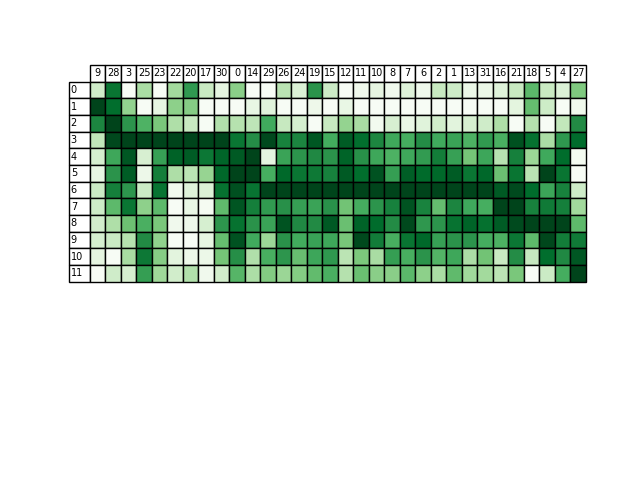

In [164]:
plot_raster(df)

# and now some decoding

In [5]:
h_angles, vaf_angles, best_x_angles, best_y_angles = session519.decode_angles(proc_rates, proc_angles)

In [6]:
np.average(vaf_angles, 1)

array([0.15147465, 0.31242343, 0.1718606 , 0.3119969 , 0.22192603,
       0.06535472, 0.2003362 ])

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
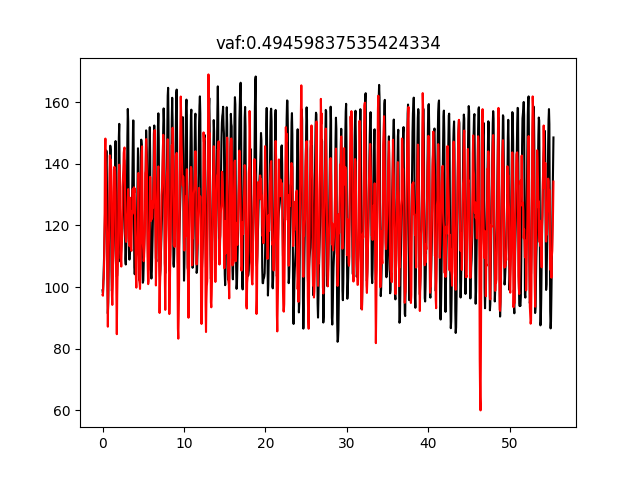

In [7]:
plot_wiener_filter_predic(best_x_angles, best_y_angles[:,3], h_angles[:,3])

In [35]:
h_toe, vaf_toe, best_x_toe, best_y_toe = session512.decode_toe_height()

[0.16648912 0.21544184 0.2970867  0.35306129 0.38050074 0.49618332
 0.36758492 0.4071439  0.42079587 0.45054131]


Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …
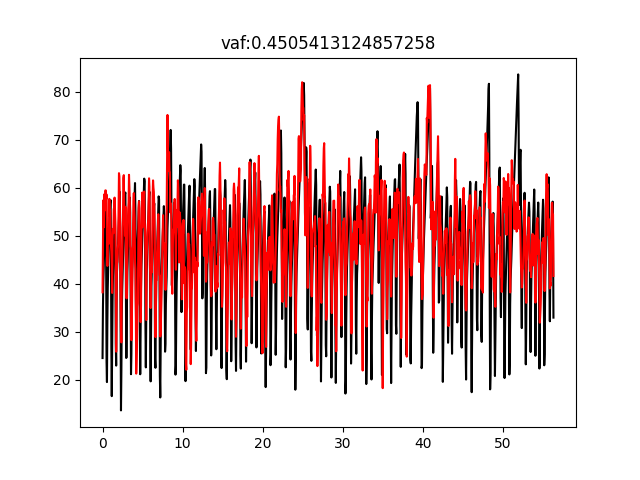

In [36]:
plot_wiener_filter_predic(best_x_toe, best_y_toe, h_toe)